En este notebook, revisaremos algunos algoritmos para determinar las raíces de funciones

### Métodos Clásicos
* Bisección
* Método de Newton 
* Método de la Secante

### Bisección

En un **bracket** es un intervalo $[a,b]$ que contiene exactamente un cero o mínimos / máximos de interés

En el caso de un cero, el corchete debe satisfacer:
$$
    \text{sign}(f(a)) \neq \text{sign}(f(b)).
$$

En caso de un máximo o un mínimo necesitamos: 
$$
    \text{sign}(f'(a)) \neq \text{sign}(f'(b))
$$

**Teorema**:  

Sea
$$
    f(x) \in C[a,b] \quad \text{and} \quad \text{sign}(f(a)) \neq \text{sign}(f(b))
$$

entonces existe un número 
$$
    c \in (a,b) \quad \text{s.t.} \quad f(c) = 0.
$$

#### Algoritmo de la bisección

Dado un corchete $ [a, b] $ y una función $ f (x) $. El método consiste de tres sucesiones ${\displaystyle a_{n}\leq p_{n}\leq b_{n}\,}$ definidas por las siguientes relaciones:

\begin{equation}
p_{n} = \dfrac{a_n + b_n}{2}, \quad a_{n+1}={\begin{cases}a_{n}&{\mbox{si }}f(a_{n})\cdot f(p_{n})<0\\p_{n}&{\mbox{si }}f(a_{n})\cdot f(p_{n})>0\end{cases}} \quad  b_{n+1}={\begin{cases}b_{n}&{\mbox{si }}f(b_{n})\cdot f(p_{n})<0\\p_{n}&{\mbox{si }}f(b_{n})\cdot f(p_{n})>0\end{cases}}
\end{equation}


    
A continuación tenemos el psudocódigo para este método

**INPUT**: Función ```f```,

los extremos de intervalo ```a```, ```b```, 
       
una tolerancia ```TOL```, 
       
el número máximo de iteraciones ```NMAX```
       
**CONDITIONS**: a < b, 

ya sea ```f(a) < 0``` y ```f(b) > 0``` o ```f(a) > 0``` y ```f(b) < 0```
            
**OUTPUT**: valor que difiere de una raíz de $f (x) = 0$ en menos de ```TOL```

 
```N ← 1```

**while** ```N ≤ NMAX``` # acota las iteraciones para evitar un bucle infinito

```c ← (a + b)/2``` # nuevo punto medio
  
  **If** ```f(c) = 0 or (b – a)/2 < TOL``` **then** # encontramos la solución
  
  ```Output(c)```
    
  **Stop**
  
  **End If**
  
  ```N ← N + 1``` # incrementamos el contador
  **If** ```sign(f(c)) = sign(f(a))``` **then** ```a ← c``` **else** ```b ← c``` # nuevo intervalo
  
**EndWhile**
```Output("Method failed.") ``` # máximo número de pasos excedido

import sys
!{sys.executable} -m pip install scipy

In [1]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def MyBisection(f, a, b,  TOL= 1e-5, NMAX= 1000):

# Initialize loop
    x = b - a
    c = a + (x/2.0)
    fa = f(a)
    fb = f(b)
    fc = f(c)

    # Loop until we reach the TOLERANCE or we take MAX_STEPS
    for step in range(1, NMAX + 1):
    

        # Check tolerance - Could also check the size of delta_x
        # We check this first as we have already initialized the values
        # in c and f_c
        if abs(fc) < TOL:
            break

        if sign(fa) != sign(fc):
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        x = b - a
        c = a + (x/2.0)
        fc = f(c)
        
    if step == NMAX:
        print("Reached maximum number of steps!")
    else:
        print("Success!")
        print("  x* = %s" % c)
        print("  f(x*) = %s" % f(c))
        print("  number of steps = %s" % step)

In [4]:
f = lambda x : x**5 - x**2 +1

In [5]:
MyBisection(f,-3,5)

Success!
  x* = -0.8087310791015625
  f(x*) = -1.7978674726748523e-06
  number of steps = 19


### Método de Newton (Newton-Raphson)
 
 Es una de las técnicas numéricas para resolver un problema de búsqueda de raíces $f(x) = 0$ más conocidas y poderosas
 
 Supongamos $f \in \mathcal{C}^2[a,b]$. Sea $\bar{x} \in [a,b]$ una aproximación de $p$ tal que $f'(\bar{x}) \neq 0$ y $p- \bar{x}$ es pequeño. Consideremos el primer polinomio de Taylor para $f(x)$ desarrollamos alrededor de $\bar{x}$.
 
 $$f(x) = f(\bar{x}) + (x-\bar{x})f'(\bar{x}) + \dfrac{(x- \bar{x})^2}{2} f''(\xi)$$
 
 donde $\xi \in [a,b]$. Dado $f(p) = 0$
 $$0 = f(\bar{x}) + (p -\bar{x})f'(\bar{x}) + \dfrac{(p - \bar{x})^2}{2} f''(\xi)$$
 
 puesto que supusimos $\vert p - \bar{x}\vert$ es muy pequeño, los términmos de orden cuadrados son despreciables.
 $$ 0 \approx f(\bar{x}) +  (p-\bar{x})f'(\bar{x})$$
 
 Despejando $p$
 
 $$p \approx \bar{x} - \dfrac{f(\bar{x})}{f'(\bar{x})}$$

A continuación tenemos el psudocódigo para este método

**INPUT**: Función ```f```,

aproximación inicial ```p0```, 
       
una tolerancia ```TOL```, 
       
el número máximo de iteraciones ```NMAX```
            
**OUTPUT**: valor que difiere de una raíz de $f (x) = 0$ en menos de ```TOL```

 
**step 1**```N ← 1```

**step 2** ```while N ≤ NMAX``` # acota las iteraciones para evitar un bucle infinito

> **step 3** ```p ← p0 - f(p0)/f'(p0)``` #

> **step 4** Si  ```| p - p0 | < TOL``` #  Entonces

> **OUTPUT** p

> **step 5**```i ← i +1```

> **step 6**```p0 ← p```

**step 7** ```OUTPUT```


In [16]:
def MyNewton(f, fp, p0,  TOL= 1e-5, NMAX= 200):

    for n in range(1, NMAX + 1):
        p0 = p0 - f(p0) / fp(p0)
        if abs(f(p0)) < TOL:
            break
        
    if n == NMAX:
        print("Reached maximum number of steps!")
    else:
        #print("Success!")
        #print("  x* = %s" % x_k)
        #print("  f(x*) = %s" % f(x_k))
        #print("  number of steps = %s" % n)
        return p0

In [17]:
fp = lambda x : 5*x**4 - 2*x

In [18]:
MyNewton(f,fp,-3)

-0.8087306005219113

### Cuencas de atracción

Dado un punto $ x_0 $, ¿podemos determinar si Newton-Raphson converge?

Una *cuenca de atracción* $ X $ para los métodos de Newton se define como el conjunto tal que $ \forall x \in X $ Newton iterations converge. Desafortunadamente, esto está lejos de ser algo trivial para determinar e incluso para funciones simples pueden conducir a regiones que son fractales.

A continuación se presentan dos ecuaciones bastante simples que demuestran el problema:
1. $ f (x) = x ^ 3 - 1 $
2. La ecuación de Kepler $ \theta - e \sin \theta = M $

In [19]:
zeros(6).reshape((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [20]:
g = lambda x : x**3 - 1
gp = lambda x : 3*x**2

x0s =  arange(-2,2,0.01)

count = 0
z0s = zeros(len(x0s)*len(x0s))

for i in x0s:
    for j in x0s:
        
        x0 =  i + j*1j 
        #print(x0)
        z0 = MyNewton(g, gp, x0)
        z0s[count] = z0.real + z0.imag
        count +=1




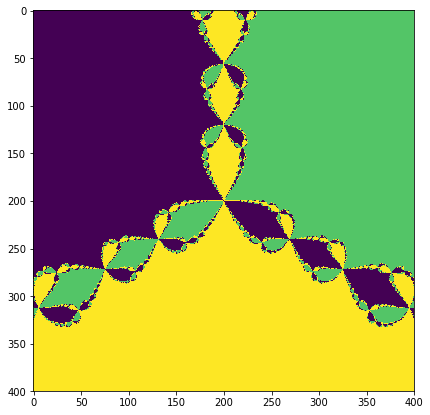

In [21]:
harvest = z0s.reshape((len(x0s), len(x0s)))


fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(harvest)
plt.show()

!pip3 install --upgrade
!pip3 install sympy 

In [22]:
from sympy import *

In [23]:
x, y = symbols('x , y')

In [24]:
type(x)

sympy.core.symbol.Symbol

In [46]:
fx = sin(x) 

In [47]:
fx

sin(x)

In [48]:
fxx=diff(fx,x,4)

In [52]:
fxx

sin(x)

In [28]:
f

<function __main__.<lambda>(x)>

In [18]:
type(diff(f(x),x).subs(x, 1))

sympy.core.numbers.Integer

In [19]:
def MyNewNewton(f, x_k,  TOL= 1e-5, NMAX= 200):
    x = symbols('x')
    fp = diff(f(x),x)
    for n in range(1, NMAX + 1):
        x_k = x_k - f(x_k) / float(fp.subs(x,x_k))
        if abs(f(x_k)) < TOL:
            break
        
    if n == NMAX:
        print("Reached maximum number of steps!")
    else:
        #print("Success!")
        #print("  x* = %s" % x_k)
        #print("  f(x*) = %s" % f(x_k))
        #print("  number of steps = %s" % n)
        return x_k

In [20]:
MyNewNewton(f, -3)

-0.8087306005219113

In [41]:
from scipy import optimize

In [42]:
optimize.newton(f, -3, fprime=lambda x: 5*x**4 - 2*x)

-0.8087306004793919

### Método de la secante

Este método proporciona una solución a $f(x)=0$ dada aproximaciones inicales $p_0$ y $p_1$. El algoritmo se muestra a continuación

A continuación tenemos el psudocódigo para este método

**INPUT**: Función ```f```,

aproximación inicaales ```p0``` y ```p1```, 
       
una tolerancia ```TOL```, 
       
el número máximo de iteraciones ```NMAX```
            
**OUTPUT**: valor que difiere de una raíz de $f (x) = 0$ en menos de ```TOL```

 
**step 1**```N ← 1```
> ```q0 ← f(p0)```

> ```q1 ← f(p1)```


**step 2** ```while N ≤ NMAX``` hacer paso 3-6# acota las iteraciones para evitar un bucle infinito

> **step 3** ```p ← p1 - q1(p1 - p0))/(q1 - q0)``` #

> **step 4** Si  ```| p - p1 | < TOL``` #  Entonces

> **OUTPUT** p

> **step 5**```i ← i +1```

> **step 6**```p0 ← p1```, ```q0 ← q1```, ```p1 ← p0``` y ```q1 ← f(p)``` 

**step 7** ```OUTPUT```



In [23]:
def MySecant(f, p0, p1, TOL= 1e-5, NMAX= 200):
    #x = symbols('x')
    #fp = diff(f(x),x)
    q0, q1 = f(p0), f(p1)
    for n in range(1, NMAX + 1):
        p = p1 - q1*(p1-p0)/(q1 - q0)
        if abs(p - p1) < TOL:
            break
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    if n == NMAX:
        print("Reached maximum number of steps!")
    else:
        #print("Success!")
        #print("  x* = %s" % x_k)
        #print("  f(x*) = %s" % f(x_k))
        #print("  number of steps = %s" % n)
        return p

In [24]:
MySecant(f, -3, 1)

-0.8087306004591074

In [25]:
f(-0.8087306004591074)

7.619593844765404e-11

## Proyecto Raíces de Funciones

### 1.- Newton multidimensional

Defina una función ```MyNewton2d(F, x_k,  TOL= 1e-5, NMAX= 200)```
cuyos argumentos sean
* Una función $F: \mathbb{R}^2 \mapsto \mathbb{R}^2$
* $\vec{x}_k \in \mathbb{R}^2$

y con esto calcule la raíz de $F$ mediante la siguiente regla de iteración $\vec{x}_{n+1} = \vec{x}_n - [D_{\vec{x}_n}F]^{-1}*F(\vec{x}_n)$

donde $[D_{\vec{x}_n}F]^{-1}$ es la inversa de la matriz Jacobiana de $F$ en $\vec{x}_{n}$, la cual se debe calcular de manera simbolica. 


Mostraremos rápidamente como calcular la matriz Jacobiana de una función de $ \mathbb{R}^2 $ en  $\mathbb{R}^2$ 

Definimos los simbolos ```x,y```

In [30]:
x, y = symbols('x , y')

La función a derivar es:

In [31]:
F = lambda x,y: [sin(x*y), exp(x+y)]

Aquí usamos el método ```Matrix``` para darle estructura de matriz a ```F``` y con el método ```jacobian([])``` calculamos la Jacobianaç

In [32]:
DF = Matrix(F(x,y)).jacobian([x, y])

In [33]:
DF

Matrix([
[y*cos(x*y), x*cos(x*y)],
[exp(x + y), exp(x + y)]])

Ahora evaluemos la matriz Jacobiana en $x =0$ y $y=2$

In [30]:
DFM = DF.subs({"x":0,"y":2})

In [31]:
DFM

Matrix([
[     2,      0],
[exp(2), exp(2)]])

Pruebe ```MyNewtonMultidim()``` para $F(x,y)=\dfrac{1}{2} \left( 1 + \frac{\sin(x)}{4}+ y ,  1 + \sin(y)+ x  \right)$

¿Cómo podría extender este método para dimensión mayor o igual que 3?

### 2.-

El medicamento administrado a un paciente produce una concentración en la corriente sanguínea dada por $c(t)= Ate^{-t/3}$ miligramos por mililitros, t horas después de inyectarse A unidades, la máxima concentración segura es de $1mg/ml$

* ¿Qúe dosis deberá inyectársele al paciente para alcanzar la máxima concentración segura y cuándo se alcaza esta concentración?

* Una cantidad adicional de medicamento deberá administrarse al paciente después de que la concentración disminuya a $0. 25 mg/ml$. Determine, con una aproximación al minuto más cercano, cuándo debe aplicarse la segunda inyección.

* Suponiendo que la concentración producida por inyecciones consecutivas es aditiva y que $75\%$ de la dosis inyectada originalmente se administra en la segunda inyección. ¿Cuándo será monento de aplicar la tercera inyección?

### Interpretación Geométrica

Explique detallamente la interpretación de los métodos descritos anteriormente.

In [36]:
F = lambda x: [A*(x)*exp**(-x/3)]

In [44]:
optimize.newton(f, -3, fprime=lambda x: 5*x**4 - 2*x)

-0.8087306004793919

In [45]:
optimize.newton(f, -3, fprime=lambda x:[A*(x)*exp**(-x/3)]

SyntaxError: unexpected EOF while parsing (<ipython-input-45-049d7bc8a1ce>, line 1)